In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

21.29586367849926 154.77980963487397
55.07231907303648 -0.09797738753130147
25.285247765443785 -48.940469799034986
-8.554529376543442 -91.1411587465063
46.85627674932843 -62.91731980883813
71.93025542755086 46.78310898615683
-78.44708898089009 1.050898784126531
-50.581669992843096 87.89017202156418
17.101725545216453 -89.9064982110095
-45.040110001520475 -31.789696451173484
-32.8790384902712 -67.14042233501536
56.895552556561256 93.08398132691644
2.970418155862234 45.48159694222633
-6.71649079143711 62.58789403769123
-76.1632379351739 1.2918108868301488
-24.882276762169653 161.81855636803192
-57.0220736457312 -62.78544434409544
-27.579914715549947 -3.916814756047387
-83.98877859531723 -154.22703510576923
28.735014940758404 15.64494917880441
-75.40171350229082 -57.26615285316602
-24.673456491457557 28.898804141805925
-84.70007137879591 -11.518239146127257
-29.24768689527697 -150.41955483934805
43.17700744253656 -126.18886487256526
-53.19411062491209 111.04099204916167
-63.12935256618023

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18cf024bfa448c54aa76570e0b6ee5b7


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | katsuura
Processing Record 2 of Set 1 | scarborough
Processing Record 3 of Set 1 | codrington
Processing Record 4 of Set 1 | san cristobal
Processing Record 5 of Set 1 | charlottetown
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | san jose
Processing Record 10 of Set 1 | cidreira
Processing Record 11 of Set 1 | san luis
Processing Record 12 of Set 1 | bolshaya murta
City not found. Skipping...
Processing Record 13 of Set 1 | mahadday weyne
City not found. Skipping...
Processing Record 14 of Set 1 | victoria
Processing Record 15 of Set 1 | pouembout
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | hun
Processing Record 20 of Set 1 | siyabuswa
Processing Recor

Processing Record 34 of Set 4 | khorramshahr
Processing Record 35 of Set 4 | toliary
City not found. Skipping...
Processing Record 36 of Set 4 | kralendijk
Processing Record 37 of Set 4 | popondetta
Processing Record 38 of Set 4 | souillac
Processing Record 39 of Set 4 | nikolskoye
Processing Record 40 of Set 4 | omsukchan
Processing Record 41 of Set 4 | amahai
Processing Record 42 of Set 4 | waingapu
Processing Record 43 of Set 4 | klaksvik
Processing Record 44 of Set 4 | cabedelo
Processing Record 45 of Set 4 | sembakung
Processing Record 46 of Set 4 | nantucket
Processing Record 47 of Set 4 | muros
Processing Record 48 of Set 4 | ucluelet
Processing Record 49 of Set 4 | verkhnyaya sinyachikha
Processing Record 50 of Set 4 | gravdal
Processing Record 1 of Set 5 | fare
Processing Record 2 of Set 5 | mount isa
Processing Record 3 of Set 5 | filadelfia
Processing Record 4 of Set 5 | sola
Processing Record 5 of Set 5 | kamenka
Processing Record 6 of Set 5 | soc trang
Processing Record 7 

Processing Record 25 of Set 8 | nueva guinea
Processing Record 26 of Set 8 | alamosa
Processing Record 27 of Set 8 | blagoveshchensk
Processing Record 28 of Set 8 | vallenar
Processing Record 29 of Set 8 | umm durman
City not found. Skipping...
Processing Record 30 of Set 8 | cimislia
Processing Record 31 of Set 8 | roanoke rapids
Processing Record 32 of Set 8 | dicabisagan
Processing Record 33 of Set 8 | staryy nadym
Processing Record 34 of Set 8 | faya
Processing Record 35 of Set 8 | nata
Processing Record 36 of Set 8 | karamay
City not found. Skipping...
Processing Record 37 of Set 8 | nouadhibou
Processing Record 38 of Set 8 | huilong
Processing Record 39 of Set 8 | papayal
Processing Record 40 of Set 8 | padang
Processing Record 41 of Set 8 | coruripe
Processing Record 42 of Set 8 | ubatuba
Processing Record 43 of Set 8 | winston-salem
Processing Record 44 of Set 8 | mercaderes
Processing Record 45 of Set 8 | nhulunbuy
Processing Record 46 of Set 8 | grand river south east
City no

Processing Record 12 of Set 12 | escanaba
Processing Record 13 of Set 12 | villazon
Processing Record 14 of Set 12 | sharanga
Processing Record 15 of Set 12 | baykit
Processing Record 16 of Set 12 | chaumont
Processing Record 17 of Set 12 | aguimes
Processing Record 18 of Set 12 | varhaug
Processing Record 19 of Set 12 | porbandar
Processing Record 20 of Set 12 | bassila
Processing Record 21 of Set 12 | namatanai
Processing Record 22 of Set 12 | butajira
Processing Record 23 of Set 12 | kawalu
Processing Record 24 of Set 12 | amambai
Processing Record 25 of Set 12 | bud
Processing Record 26 of Set 12 | bataipora
Processing Record 27 of Set 12 | ola
Processing Record 28 of Set 12 | mehamn
Processing Record 29 of Set 12 | praia
Processing Record 30 of Set 12 | hobyo
Processing Record 31 of Set 12 | cururupu
Processing Record 32 of Set 12 | okandja
City not found. Skipping...
Processing Record 33 of Set 12 | athabasca
Processing Record 34 of Set 12 | punta alta
Processing Record 35 of Set

In [11]:
len(city_data)

570

In [29]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_df = pd.DataFrame(city_data)
city_df=city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_df.head(len(city_data))

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Katsuura,JP,2022-11-14 20:07:20,35.1333,140.3000,59.49,75,100,11.74
1,Scarborough,GB,2022-11-14 20:16:19,54.2797,-0.4044,49.66,92,0,5.55
2,Codrington,AU,2022-11-14 20:16:19,-38.2667,141.9667,48.49,65,100,17.49
3,San Cristobal,VE,2022-11-14 20:12:35,7.7669,-72.2250,78.98,60,68,4.25
4,Charlottetown,CA,2022-11-14 20:13:27,46.2352,-63.1267,39.56,80,97,20.00
...,...,...,...,...,...,...,...,...,...
565,Merauke,ID,2022-11-14 20:30:57,-8.4667,140.3333,78.35,88,100,7.99
566,Sinnamary,GF,2022-11-14 20:30:57,5.3833,-52.9500,80.42,81,21,11.18
567,Akureyri,IS,2022-11-14 20:30:58,65.6835,-18.0878,42.73,93,100,2.30
568,Libertador General San Martin,AR,2022-11-14 20:30:58,-23.8064,-64.7876,79.11,40,45,4.23


In [25]:
# Create the output file (CSV).
city_df = "weather_data/cities.csv"



In [26]:
# Export the City_Data into a CSV.
city_data_df.to_csv(city_df, index_label="City_ID")

In [34]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

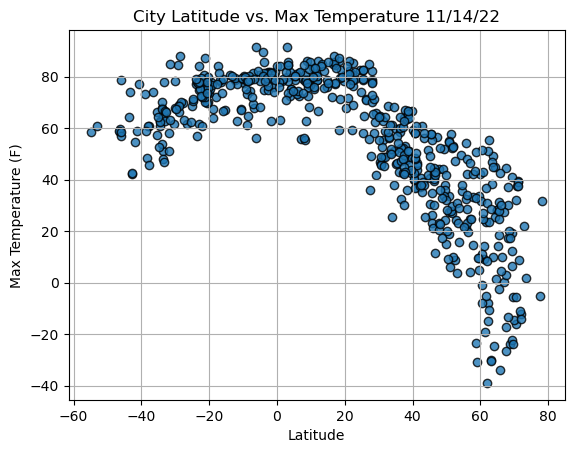

In [35]:
# Import time module
import time


# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

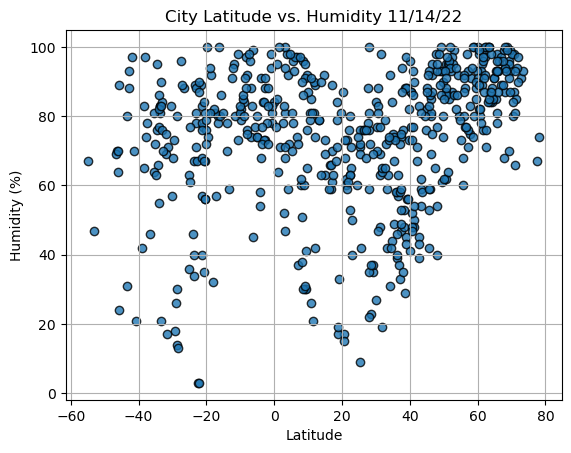

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

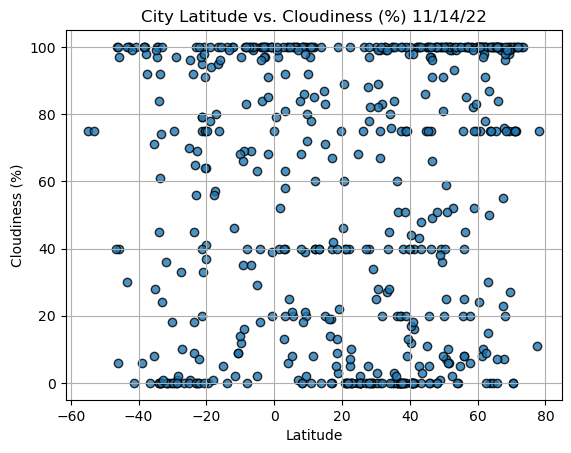

In [37]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

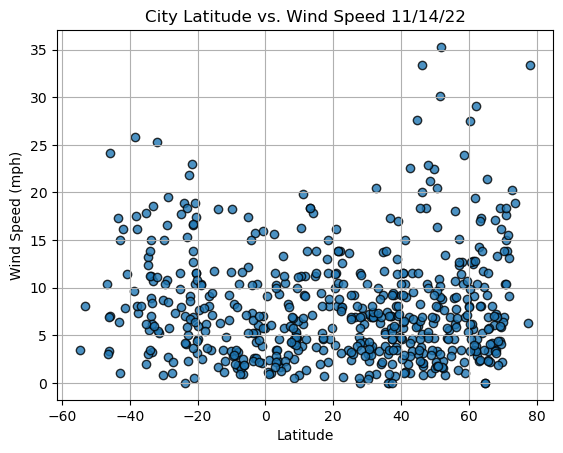

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [42]:
#6.4.2 Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

IndentationError: expected an indented block (3545094131.py, line 4)

In [43]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [48]:
index13 = city_data_df.loc[13]
index13

City                    Jamestown
Lat                        42.097
Lng                      -79.2353
Max Temp                    36.99
Humidity                       67
Cloudiness                    100
Wind Speed                   1.99
Country                        US
Date          2022-11-14 20:15:39
Name: 13, dtype: object

In [49]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
565    False
566     True
567     True
568    False
569     True
Name: Lat, Length: 570, dtype: bool

In [50]:
city_data_df.loc[(city_data_df["Lat"]>=0)]
city_data_df.loc[(city_data_df["Lat"]>=0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Katsuura,35.1333,140.3000,59.49,75,100,11.74,JP,2022-11-14 20:07:20
1,Scarborough,54.2797,-0.4044,49.66,92,0,5.55,GB,2022-11-14 20:16:19
3,San Cristobal,7.7669,-72.2250,78.98,60,68,4.25,VE,2022-11-14 20:12:35
4,Charlottetown,46.2352,-63.1267,39.56,80,97,20.00,CA,2022-11-14 20:13:27
7,San Jose,37.3394,-121.8950,63.79,47,20,4.61,US,2022-11-14 20:16:21


In [51]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

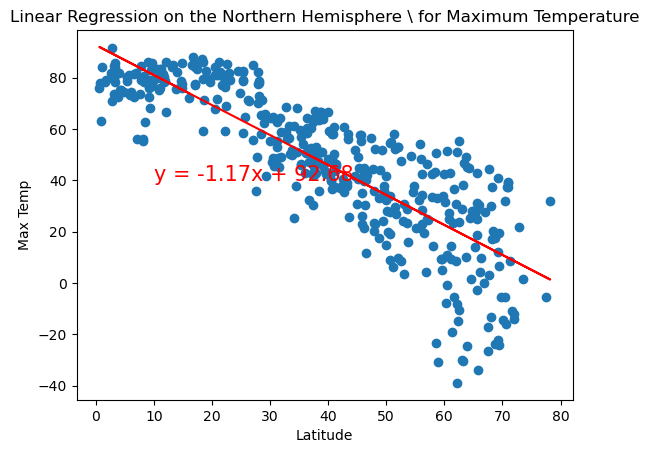

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp',(10,40))

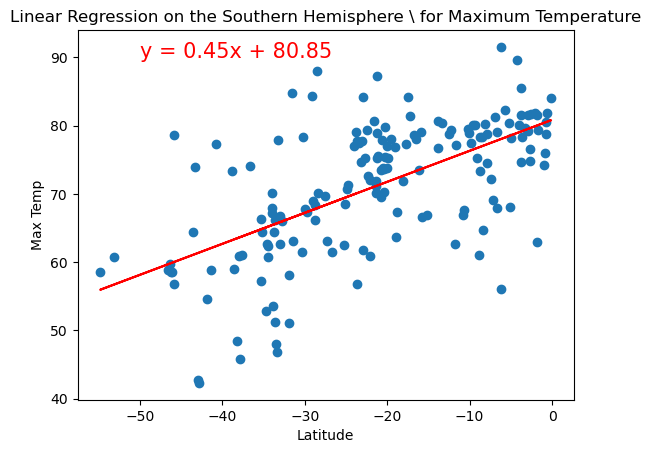

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for Maximum Temperature', 'Max Temp',(-50,90))

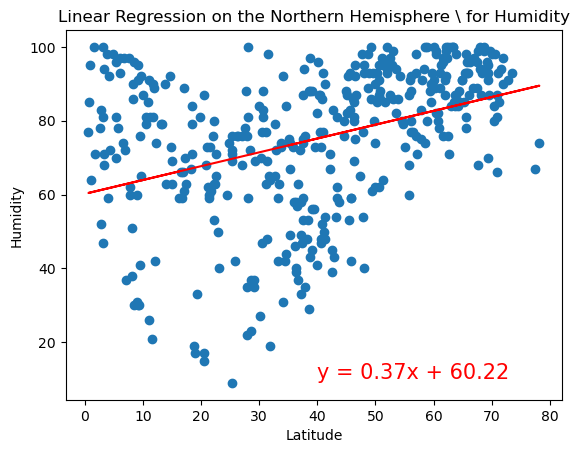

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for Humidity', 'Humidity',(40,10))

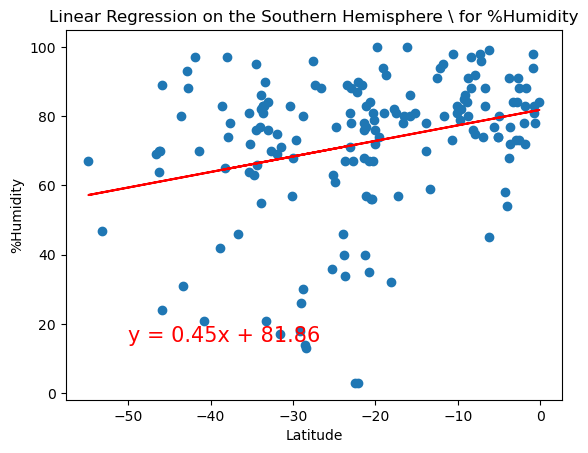

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for %Humidity', '%Humidity',(-50,15))

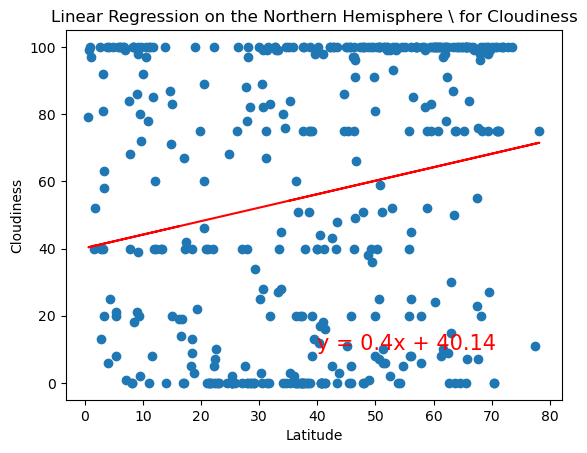

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for Cloudiness', 'Cloudiness',(40,10))

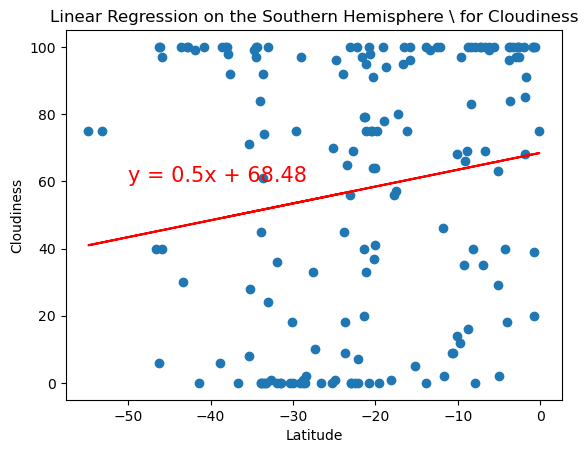

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for Cloudiness', 'Cloudiness',(-50,60))

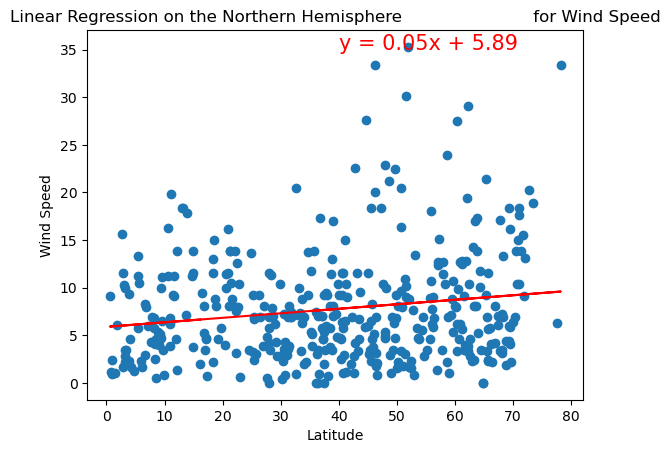

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

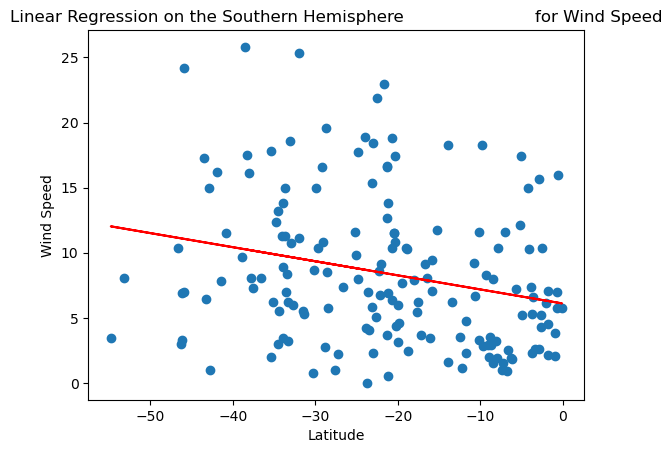

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))